# Natural Language Processing
### Help Twitter Combat Hate Speech Using NLP and Machine Learning
---------------------------------------------------------------------------------------------------------------------
#### DESCRIPTION
---------------------------------------------------------------------------------------------------------------------
Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

### Problem Statement:
----------------------------------------------------------------------------------------------------------------------
Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium to spread hate.

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

#### Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

#### Content:

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

-----------------------------------------------------------------------------------------------------------------------

### IMPORT THE REQUIRED LIBRARIES

In [1]:
# General packages for data manipulation
import os
import pandas as pd
import numpy as np

In [2]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Consistent plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

In [4]:
# Handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [5]:
# Text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [6]:
# Regular expressions
import re

### 1. Load the tweets file using read_csv function from Pandas package.

In [7]:
tweetData = pd.read_csv('TwitterHate.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweetData.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
tweetData.label.unique()

array([0, 1], dtype=int64)

In [9]:
tweetData.tweet.unique()

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       '  to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher',
       'listening to sad songs on a monday morning otw to work is sad  ',
       'thank you @user for you follow  '], dtype=object)

In [10]:
tweetData.label.count()

31962

In [11]:
tweetData.tweet.count()

31962

In [12]:
tweetData.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

- Based on the above data, 29720 and 2242 , ITS AN UNBALANCED DATA
- Here we can not use smote analysis as this is only for numerical values.

In [13]:
tweetData.tweet.value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                       319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets          82
aww yeah it's all good bing bong bing bong                                                                  75
i'm so   and #grateful now that - #affirmations                                                             56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                        40
                                                                                                          ... 
saturday morning with @user  #poweredbyguayusa #cleanenergy                                                  1
when alec does your makeup and you feel fleek af on a wednesday night. #humpday #makeup  â¦                 1
a n g r y ð¤   #msqrd #beard #bearded #bear #black #white #shoulders #man #guy #boy #brown @user           1
@

### 2. Get the tweets into a list for easy text cleanup and manipulation.

In [14]:
# drop the id column
tweetData.drop('id',axis=1,inplace=True)

In [15]:
# Read the columns
tweetData.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### 3. To cleanup:

    1. Normalize the casing.
    2. Using regular expressions, remove user handles. These begin with '@’.
    3. Using regular expressions, remove URLs.
    4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    5. Remove stop words.
    6. Remove redundant terms like ‘amp’, ‘rt’, etc.
    7. Remove ‘#’ symbols from the tweet while retaining the term.
    

In [16]:
# 1. Normalize the casing.
import unicodedata
def simplify(text):
    '''Function to handle the diacritics in the text'''
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [17]:
tweetData['tweet'] = tweetData['tweet'].apply(simplify)

In [18]:
tweetData.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [19]:
# 2. Using regular expressions, remove user handles. These begin with '@’.
tweetData['tweet'].replace(r'@\w+','',regex=True,inplace=True)

In [20]:
tweetData.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [21]:
# 3. Using regular expressions, remove URLs.
tweetData['tweet'].replace(r'http\S+','',regex=True,inplace=True)

In [22]:
tweetData.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [23]:
# 4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
tokenizer = TweetTokenizer(preserve_case=True)
tweetData['tweet'] = tweetData['tweet'].apply(tokenizer.tokenize)

In [24]:
tweetData.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[#model, i, love, u, take, with, u, all, the, ..."
4,0,"[factsguide, :, society, now, #motivation]"


In [25]:
# 5. Remove stop words.
stopWords = stopwords.words('english')
stopWords[:3]

['i', 'me', 'my']

In [26]:
# 6. Remove redundant terms like ‘amp’, ‘rt’, etc.
redundantTerms = ['amp','rt']

for words in redundantTerms:
    stopWords.append(words)

In [27]:
stopWords[-10:]

['wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt']

In [28]:
# Function to remove the stop words from the text corpus
def removeStopWords(text):
    cleanTextData = [word for word in text if not word in stopWords]
    return cleanTextData

In [29]:
removeStopWords

<function __main__.removeStopWords(text)>

In [30]:
tweetData['tweet'] = tweetData['tweet'].apply(removeStopWords)

In [31]:
tweetData.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, #lyft, credit, can't, use, cause, off..."
2,0,"[bihday, majesty]"
3,0,"[#model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, #motivation]"


In [32]:
# 7. Remove ‘#’ symbols from the tweet while retaining the term.
def removeHashSymbols(text):
    pattern = re.compile(r'#')
    text = ' '.join(text)
    cleanTextData = re.sub(pattern,'',text)
    return tokenizer.tokenize(cleanTextData)

In [33]:
tweetData['tweet'] = tweetData['tweet'].apply(removeHashSymbols)

In [34]:
tweetData.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, can't, use, cause, offe..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


### 4. Extra cleanup by removing terms with a length of 1.

In [35]:
def removeShortWords(text):
    lengths = [1]
    newText = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(newText) if not len(word) in lengths]
        
    return newText

In [36]:
tweetData['tweet'] = tweetData['tweet'].apply(removeShortWords) 

In [37]:
tweetData.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit can't use cause offer wheel...
2,0,bihday majesty
3,0,model love u take u time ur ! ! !
4,0,factsguide : society motivation


In [38]:
tweetData['tweet'] = tweetData['tweet'].apply(tokenizer.tokenize)

In [39]:
tweetData.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, can't, use, cause, offe..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


### 5. Check out the top terms in the tweets:

   1. First, get all the tokenized terms into one large list.
   2. Use the counter and find the 10 most common terms.
   

In [40]:
from collections import Counter
results = Counter()
tweetData['tweet'].apply(results.update)

0        None
1        None
2        None
3        None
4        None
         ... 
31957    None
31958    None
31959    None
31960    None
31961    None
Name: tweet, Length: 31962, dtype: object

In [41]:
#print the top 10 most common terms in the tweet 
#print(results.most_common(10))
results.most_common(10)

[('!', 13985),
 ('.', 12189),
 (',', 6299),
 ('...', 2771),
 ('love', 2760),
 ('?', 2560),
 (':', 2363),
 ('day', 2300),
 ('"', 1851),
 ('&', 1774)]

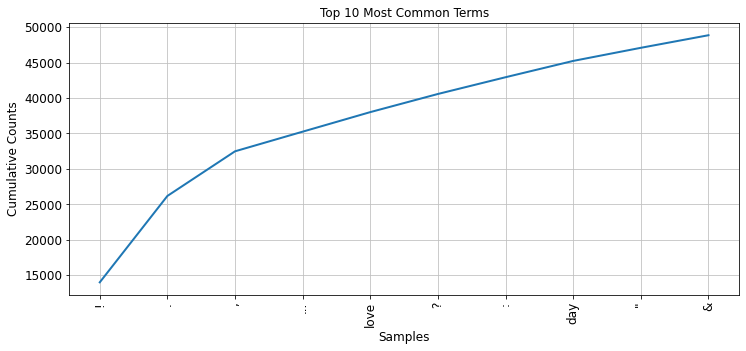

In [42]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

In [43]:
# Remove the special characters
# Function to remove the non-alphanumeric characters from the text
def removeNonAlpha(text):
    text = [word for word in text if word.isalpha()]
    return text

In [44]:
# Remove the non alpha numeric characters from the tweet tokens
tweetData['tweet'] = tweetData['tweet'].apply(removeNonAlpha)

In [45]:
tweetData.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"


In [46]:
# Remove digits
def removeDigits(text):
    noDigits = []
    for word in text:
        noDigits.append(re.sub(r'\d','',word))
    return ' '.join(noDigits)

In [47]:
tweetData['tweet'] = tweetData['tweet'].apply(removeDigits)

In [48]:
tweetData.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [49]:
# for not to display the output
! pip install textblob --upgrade --quiet 

You should consider upgrading via the 'c:\users\davea\anaconda3\python.exe -m pip install --upgrade pip' command.


In [50]:
#print the top 10 most common terms in the tweet 
#print(results.most_common(10))
results.most_common(10)

[('!', 13985),
 ('.', 12189),
 (',', 6299),
 ('...', 2771),
 ('love', 2760),
 ('?', 2560),
 (':', 2363),
 ('day', 2300),
 ('"', 1851),
 ('&', 1774)]

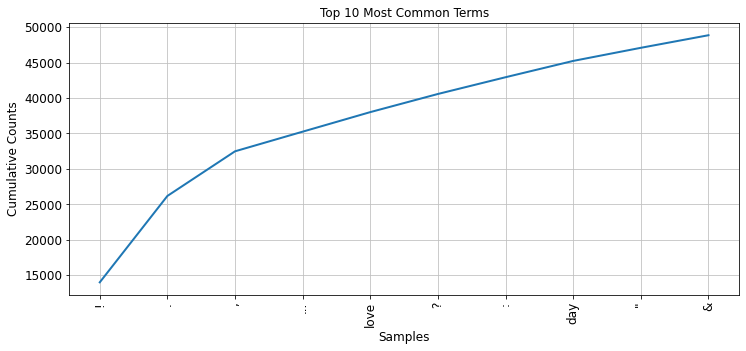

In [51]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

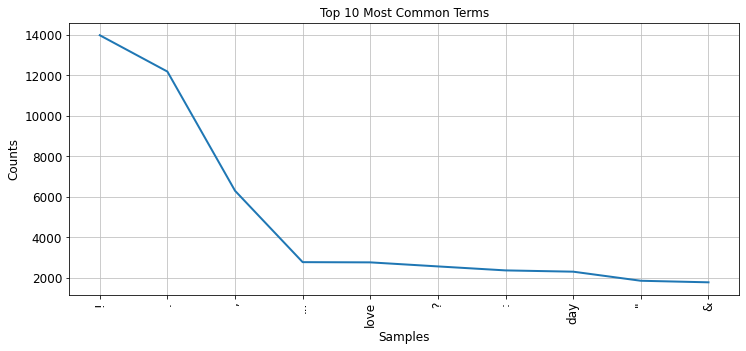

In [52]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

### Check for Data Balance 

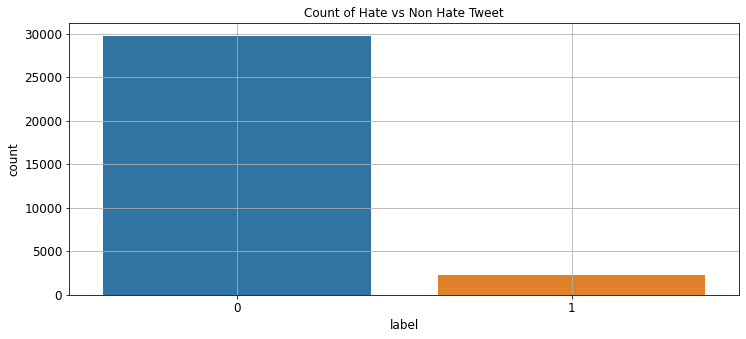

In [53]:
#plot of the count of hate and non hate tweet
sns.countplot(tweetData['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

- the above data shows explicitly that is an unbalanced data,and need to be worked out for better accuracy of the model

### 6. Data formatting for predictive modeling:

    1. Join the tokens back to form strings. This will be required for the vectorizers.
    2. Assign x and y.
    3. Perform train_test_split using sklearn.

In [54]:
tweetData.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [55]:
# Check for the null values
tweetData.isnull().sum()

label    0
tweet    0
dtype: int64

In [56]:
#Create feature and label set
features = tweetData.iloc[:,1].values
label = tweetData.iloc[:,0].values # double brackets are not required as it is 1-d

In [57]:
features

array(['father dysfunctional selfish drags kids dysfunction run',
       'thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked',
       'bihday majesty', ...,
       'listening sad songs monday morning otw work sad',
       'sikh temple vandalised calgary wso condemns act', 'thank follow'],
      dtype=object)

In [58]:
label

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
#Create Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=6,
                                                stratify=label)

In [60]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


### 7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

    1. Import TF-IDF vectorizer from sklearn.
    2. Instantiate with a maximum of 5000 terms in your vocabulary.
    3. Fit and apply on the train set.
    4. Apply on the test set.

In [61]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [62]:
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)

In [63]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)

In [64]:
#transform the test data
X_test = vectorizer.transform(X_test)

In [65]:
# Check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

### 8. Model building: Ordinary Logistic Regression

    1. Instantiate Logistic Regression from sklearn with default parameters.
    2. Fit into the train data.
    3. Make predictions for the train and the test set.

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

### 9. Model evaluation: Accuracy, recall, and f_1 score.

    1. Report the accuracy on the train set.
    2. Report the recall on the train set: decent, high, or low.
    3. Get the f1 score on the train set.

In [68]:
# import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.4f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.4f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.9551
Accuracy Score on test set 0.9496


- test score is > train score then the model is generalized, we depend on accuracy only to determine the generalized or not. 
- Accuracy is not a good metric for an imbalanced dataset and in this case also. But F1 score will help us to understand the performance of the model. 
- A low f1-score for a label, is poor performance of the model.

In [70]:
print('Classification Report on Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report on Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.94      0.38      0.54      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.96      0.95     25569



- The model's f1-score is low for label 1 , Label: 0 (non-hate) /1 (hate) in the twitter
- The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.
- a good F1 score means that you have low false positives and low false negatives.
- An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0 .
- Here model is good for non-hate text in the twitter as F1 score of label '0' is good which is 0.98

### 10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

    1. Adjust the appropriate class in the LogisticRegression model.
    

In [71]:
tweetData.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [72]:
29720/2242

13.256021409455842

- imbalance is in the ration of 13:1 with the labels
- class_weight ratio is inverse of labels ratio , it is 1: 13

In [73]:
weightsRatio = {0:1,1:13}

# instantiate the logistic regression model and consider for the weights to be applied for model coefficients 
# update magnitude
model = LogisticRegression(solver='lbfgs',class_weight=weightsRatio)


### 11. Train again with the adjustment and evaluate.

    1. Train the model on the train set.
    2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
    

In [74]:
#fit and predict
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [75]:
print('Classification Report on Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report on Training set


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.60      0.98      0.75      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.97      0.86     25569
weighted avg       0.97      0.95      0.96     25569



- F1 score of label '1' is enhanced with weightsratio, but synthatic data augmentation approach will help us to understand the better accuary of the model.

### 12. Regularization and Hyperparameter tuning:

    1. Import GridSearch and StratifiedKFold because of class imbalance.
    2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3. Use a balanced class weight while instantiating the logistic regression.
### 13. Find the parameters with the best recall in cross-validation.

    1. Choose ‘recall’ as the metric for scoring.
    2. Choose a stratified 4 fold cross-validation scheme.
    3. Fit into the train set.

In [76]:
# Import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [77]:
# Define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

print(space) #check the search space 

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002054E040B50>}


In [78]:
#define the model with balanced class weights

weightsRatio = {0:1.0,1:1.0}
model = LogisticRegression(class_weight=weightsRatio)

#define the number of folds 

folds = StratifiedKFold(n_splits=4)

# define search

grid_search = RandomizedSearchCV(estimator=model,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=10)

In [79]:
# fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

C:\Users\davea\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.03399668 0.27145765        nan 0.33444609
        nan 0.                nan 0.                nan        nan
 0.1683329         nan 0.00167286        nan        nan        nan
        nan        nan 0.48773564 0.54289791        nan        nan
 0.         0.58806027 0.                nan 0.         0.
 0.         0.                nan        nan 0.54289915        nan
        nan 0.03845724        nan        nan        nan        nan
 0.53008173 0.58248364        nan        nan        nan        nan
 0.         0.         0.18282567        nan        nan 0.
        nan 0.         0.         0.11705203        nan        nan
        nan        nan        nan 0.         0.03511026        nan
        nan 0.                nan 0.54513129 0.52785083        nan
 0.         0.                nan        nan        nan 0.02843496
 0

### 14. What are the best parameters?

In [80]:
#retrieve the best model 
grid_result.best_estimator_

LogisticRegression(C=56.00827343947552, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

### 15. Predict and evaluate using the best estimator.

    1. Use the best estimator from the grid search to make predictions on the test set.
    2. What is the recall on the test set for the toxic comments?
    3. What is the f_1 score?

In [81]:
#instantiate the best model
model = LogisticRegression(C=20.635132288771864,penalty='l2',solver='liblinear',class_weight=weightsRatio)

#fit and predict
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [82]:
print('Classification Report on Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report on Training set


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23775
           1       0.97      0.83      0.90      1794

    accuracy                           0.99     25569
   macro avg       0.98      0.91      0.94     25569
weighted avg       0.99      0.99      0.99     25569



In [83]:
print('Classification Report on Test set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report on Test set


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5945
           1       0.76      0.56      0.64       448

    accuracy                           0.96      6393
   macro avg       0.86      0.77      0.81      6393
weighted avg       0.95      0.96      0.95      6393



# SUMMARY OF THE RESULTS

- Logistic Regression is used to classify the hate and non-hate text in the twitter
- Recall on the test set is 0.56 for hate comments in the twitter
- F1 score of the label '1' 'hate' comments in the twitter is 0.64, which means model is ok.
- we can try with other classifiers such as Naive Bayes , which is better than the Normal Logistic Regression Classifier.